In [1]:
# 데이터 구성 패키지 : Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np
# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# grapviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz
# matplotlib 이용한 Background 그래프 실행 및 결과 확인
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree/RandomForest/그래디언트 부스팅
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# 모델 성능 평가 라이브러리
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
# mse와 mae 비교 / 주성분분석 / 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
# 최대 열 수 설정df_raw
pd.set_option('display.max_columns', 500)
# 표시할 가로의 길이
pd.set_option('display.width', 1000)
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix
#stats model
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
import statsmodels.api as sm8
#선형 회귀모형
from sklearn.linear_model import LinearRegression
import graphviz
import os
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency
from scipy import stats
#한글 폰트(나눔 고딕) 리눅스 환경이라 새로 설치를 했습니다.
matplotlib.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
# 폰트 사이즈
plt.rcParams['font.size'] = 10.
# x축 라벨사이즈
plt.rcParams['xtick.labelsize'] = 10.
# y축 라벨사이즈
from sklearn.metrics import confusion_matrix
from statsmodels.stats.proportion import proportions_ztest
from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score
#한글 폰트(나눔 고딕) 리눅스 환경이라 새로 설치를 했습니다.
matplotlib.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
# 폰트 사이즈
plt.rcParams['font.size'] = 10.
# x축 라벨사이즈
plt.rcParams['xtick.labelsize'] = 10.
# y축 라벨사이즈
plt.rcParams['ytick.labelsize'] = 10.
#그래프 축 폰트사이즈
plt.rcParams['axes.labelsize'] = 10.

plt.rcParams['ytick.labelsize'] = 10.
#그래프 축 폰트사이즈
plt.rcParams['axes.labelsize'] = 10.

os.environ["PATH"] += os.pathsep + "./graphviz/bin"

#로지스틱 회귀분석
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score

#분류SVM
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix


%matplotlib inline

In [2]:
df_raw = pd.read_csv('review_2.csv',encoding = 'euckr')
df_raw = df_raw.drop('Unnamed: 0' , axis =1)
df_raw

,Unnamed: 0.1,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,rfm,n_risk
0,15,C112379,혈액검사,재검,2014-12-09,1,69,160,59,84.0,72.0,80,135,66.0,231.0,-1.0,103.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,115.0,29.0,17.0,-1.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,45.0,19.6,1.0
1,34,C112404,혈액검사,재검,2015-03-29,1,69,175,79,101.0,92.0,80,120,70.0,264.0,-1.0,74.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,55.0,25.0,20.0,156.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.8,52.6,26.0,0.0
2,38,C112411,일반검진,재검,2015-09-20,1,69,165,70,92.0,88.0,75,120,68.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,25.7,53.3,26.5,0.0
3,138,C112570,일반검진,재검,2015-05-27,1,67,165,75,95.0,89.0,90,140,70.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,27.5,53.9,26.9,0.0
4,236,C112727,일반검진,승인,2015-06-24,1,65,160,50,89.0,66.0,80,130,64.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,19.5,41.2,15.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,14911,C134186,일반검진,승인,2015-05-12,2,38,161,65,94.0,80.0,70,110,72.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,25.1,49.7,35.8,0.0
4075,14917,C134221,혈액검사,재검,2015-09-09,2,51,159,52,85.0,72.0,70,110,72.0,262.0,0.9,91.0,14.0,0.0,40.9,31.0,34.0,90.0,279.0,455.0,8600.0,18.0,21.0,19.0,149.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.6,45.3,31.8,0.0
4076,14921,C134227,혈액검사,재검,2014-11-25,2,45,153,45,88.0,74.0,80,120,76.0,227.0,-1.0,102.0,13.3,0.0,41.0,29.0,32.0,89.0,327.0,460.0,6600.0,-1.0,-1.0,18.0,-1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.2,48.4,34.6,0.0
4077,14931,C134250,일반검진,승인,2015-09-16,2,52,164,60,90.0,66.0,80,120,70.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,22.3,40.2,26.3,0.0


In [3]:
df_raw.isna().sum()

Unnamed: 0.1         0
customer_id          0
review_cat           0
judge                0
review_date          0
gender               0
age                  0
height               0
weight               0
bust                 0
waist                0
bp_min               0
bp_max               0
pulse_count          0
bt_chol              0
bt_crea              0
bt_gluc              0
bt_hb                0
bt_hbsa              0
bt_hct               0
bt_mch               0
bt_mchc              0
bt_mvc               0
bt_plat              0
bt_rbc               0
bt_wbc               0
bt_rgpt              0
bt_sgot              0
bt_sgpt              0
bt_trig              0
judge_score          0
bp_judge             0
pulse_count_judge    0
bt_chol_judge        0
bt_crea_judge        0
bt_gluc_judge        0
bt_hb_judge          0
bt_hbsa_judge        0
bt_hct_judge         0
bt_mch_judge         0
bt_mchc_judge        0
bt_mvc_judge         0
bt_plat_judge        0
bt_rbc_judg

In [4]:
bl_2 = df_raw[df_raw['review_cat']=='혈액검사']
bl_2

,Unnamed: 0.1,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,rfm,n_risk
0,15,C112379,혈액검사,재검,2014-12-09,1,69,160,59,84.0,72.0,80,135,66.0,231.0,-1.0,103.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,115.0,29.0,17.0,-1.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,45.0,19.6,1.0
1,34,C112404,혈액검사,재검,2015-03-29,1,69,175,79,101.0,92.0,80,120,70.0,264.0,-1.0,74.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,55.0,25.0,20.0,156.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.8,52.6,26.0,0.0
7,261,C112759,혈액검사,승인,2015-09-02,1,64,168,64,98.0,83.0,70,110,72.0,193.0,0.8,92.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,32.0,22.0,18.0,119.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.7,49.4,23.5,0.0
8,337,C112856,혈액검사,재검,2015-08-04,1,62,165,70,96.0,82.0,80,130,64.0,142.0,1.2,84.0,17.4,0.0,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,2,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.7,49.7,23.8,0.0
10,352,C112878,혈액검사,승인,2015-08-26,1,62,172,61,90.0,73.0,80,120,60.0,148.0,1.0,87.0,14.1,0.0,41.4,34.0,34.0,98.0,270.0,421.0,6800.0,32.0,28.0,19.0,65.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.6,42.4,16.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,14900,C134165,혈액검사,재검,2015-01-15,2,48,162,67,101.0,82.0,80,120,68.0,192.0,-1.0,89.0,10.0,1.0,35.6,22.0,28.0,78.0,328.0,455.0,4000.0,-1.0,14.0,18.0,-1.0,6,0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.5,50.6,36.5,0.0
4072,14903,C134171,혈액검사,승인,2015-04-20,2,35,153,45,80.0,64.0,70,110,70.0,179.0,0.7,81.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,17.0,14.0,11.0,124.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.2,41.8,28.2,0.0
4073,14904,C134172,혈액검사,재검,2015-01-09,2,37,160,70,99.0,91.0,80,120,68.0,190.0,-1.0,88.0,13.2,1.0,39.4,32.0,34.0,97.0,189.0,406.0,4200.0,32.0,35.0,39.0,-1.0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.3,56.9,40.8,1.0
4075,14917,C134221,혈액검사,재검,2015-09-09,2,51,159,52,85.0,72.0,70,110,72.0,262.0,0.9,91.0,14.0,0.0,40.9,31.0,34.0,90.0,279.0,455.0,8600.0,18.0,21.0,19.0,149.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.6,45.3,31.8,0.0


In [5]:
bl_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3205 entries, 0 to 4076
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       3205 non-null   int64  
 1   customer_id        3205 non-null   object 
 2   review_cat         3205 non-null   object 
 3   judge              3205 non-null   object 
 4   review_date        3205 non-null   object 
 5   gender             3205 non-null   int64  
 6   age                3205 non-null   int64  
 7   height             3205 non-null   int64  
 8   weight             3205 non-null   int64  
 9   bust               3205 non-null   float64
 10  waist              3205 non-null   float64
 11  bp_min             3205 non-null   int64  
 12  bp_max             3205 non-null   int64  
 13  pulse_count        3205 non-null   float64
 14  bt_chol            3205 non-null   float64
 15  bt_crea            3205 non-null   float64
 16  bt_gluc            3205 

결측치 제외 데이터 열 불러오기

In [6]:
bl_test = bl_2[['age','gender', 'height', 'weight', 'bust', 'waist', 'bmi', 'whtr',
       'bp_min', 'bp_max', 'pulse_count', 'bt_chol', 'bt_gluc','bt_hbsa',
       'bt_sgpt', 'judge_score',
       'bp_judge', 'pulse_count_judge', 'bt_chol_judge', 'bt_crea_judge',
       'bt_gluc_judge', 'bt_hb_judge', 'bt_hbsa_judge', 'bt_hct_judge',
       'bt_mch_judge', 'bt_mchc_judge', 'bt_mvc_judge', 'bt_plat_judge',
       'bt_rbc_judge', 'bt_wbc_judge', 'bt_rgpt_judge', 'bt_sgot_judge',
       'bt_sgpt_judge', 'bt_trig_judge', 'n_risk']]

In [7]:
bl_test.isna().sum()

age                  0
gender               0
height               0
weight               0
bust                 0
waist                0
bmi                  0
whtr                 0
bp_min               0
bp_max               0
pulse_count          0
bt_chol              0
bt_gluc              0
bt_hbsa              0
bt_sgpt              0
judge_score          0
bp_judge             0
pulse_count_judge    0
bt_chol_judge        0
bt_crea_judge        0
bt_gluc_judge        0
bt_hb_judge          0
bt_hbsa_judge        0
bt_hct_judge         0
bt_mch_judge         0
bt_mchc_judge        0
bt_mvc_judge         0
bt_plat_judge        0
bt_rbc_judge         0
bt_wbc_judge         0
bt_rgpt_judge        0
bt_sgot_judge        0
bt_sgpt_judge        0
bt_trig_judge        0
n_risk               0
dtype: int64

## 탐색적 분석

In [8]:
def myhist(data,var):
    plt.hist(data[data['n_risk']==0][var],label = '저위험', alpha = 0.5)
    plt.hist(data[data['n_risk']==1][var],label = '고위험', alpha = 0.5)
    plt.legend()
    
def mycrosstab(data,var) : 
    print(pd.crosstab(index = data['n_risk'], columns = data[var]))
    print()
    print(pd.crosstab(index = data['n_risk'], columns = data[var],normalize = 'columns').round(3))
    
def my_t(data,var):
    k = stats.levene(data[data['n_risk']==0][var],data[data['n_risk']==1][var])
    t_result = stats.ttest_ind(data[data['n_risk']==0][[var]],
                               data[data['n_risk']==1][[var]],equal_var=True) # 2 sample 비교 명령어

    t,p = t_result
    print(k,p)

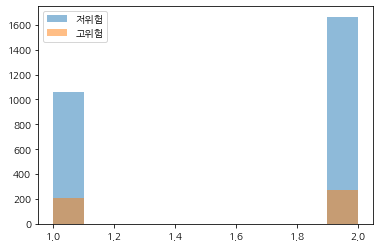

In [9]:
myhist(bl_test,'gender')

In [10]:
mycrosstab(bl_test,'gender')

gender     1     2
n_risk            
0.0     1063  1665
1.0      205   272

gender      1     2
n_risk             
0.0     0.838  0.86
1.0     0.162  0.14


In [11]:
a = 1064 ; b = 1666 ; c = 206 ; d = 271

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3))) # gender 보류

p-value는 0.083


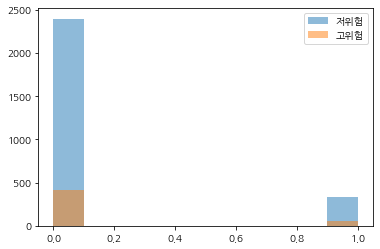

In [12]:
myhist(bl_test,'bt_hbsa')

In [13]:
mycrosstab(bl_test,'bt_hbsa')

bt_hbsa   0.0  1.0
n_risk            
0.0      2396  332
1.0       419   58

bt_hbsa    0.0    1.0
n_risk               
0.0      0.851  0.851
1.0      0.149  0.149


In [14]:
a = 2398 ; b = 332 ; c = 418 ; d = 59

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3))) 

p-value는 0.898


In [15]:
bl_num = bl_test.select_dtypes(exclude = 'object')

In [16]:
log_model = Logit.from_formula(''' n_risk ~ age+height+bust+C(gender)+
+bmi+whtr+bp_min+bp_max+pulse_count
+bt_chol+bt_gluc+bt_sgpt+
bp_judge+pulse_count_judge+bt_chol_judge+
bt_crea_judge+bt_gluc_judge+bt_hb_judge+
bt_hbsa_judge+bt_hct_judge+bt_mch_judge+
bt_mchc_judge+bt_mvc_judge+bt_plat_judge+bt_rbc_judge+
bt_wbc_judge+bt_rgpt_judge+bt_sgot_judge+bt_sgpt_judge+bt_trig_judge ''',data = bl_num)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

Optimization terminated successfully.
         Current function value: 0.413428
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 n_risk   No. Observations:                 3205
Model:                          Logit   Df Residuals:                     3174
Method:                           MLE   Df Model:                           30
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.01722
Time:                        01:03:18   Log-Likelihood:                -1325.0
converged:                       True   LL-Null:                       -1348.3
Covariance Type:            nonrobust   LLR p-value:                   0.02816
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.0122      2.380     -0.845      0.398      -6.678       2.653
C(gender

In [17]:
df_x = bl_num.drop(['n_risk','judge_score','waist','weight'],axis = 1)
df_x # 종속 변수 빼고 새롭게 데이터 프레임 생성
df_x_const = add_constant(df_x) # const열 생성

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF',inplace=True)
df_vif.round(3) # 다중공선성 존재 X -> 회귀식 자체로 판단

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variable,VIF
15,pulse_count_judge,1.007
9,pulse_count,1.021
27,bt_wbc_judge,1.030
17,bt_crea_judge,1.065
25,bt_plat_judge,1.090
31,bt_trig_judge,1.140
26,bt_rbc_judge,1.172
28,bt_rgpt_judge,1.209
16,bt_chol_judge,1.378
29,bt_sgot_judge,1.383


## 다중공선성_case1

정밀도 0.25 X

In [18]:
df_y = bl_num['n_risk']
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_x,df_y)
# df_x는 다중 공선성으로 제거 후 남은 x인자만 존재
selected_cols = df_x.columns[rfe.support_]
removed_cols = df_x.columns[~rfe.support_]

print("select variables : ",selected_cols)
print("removed variable : ",removed_cols)

select variables :  Index(['pulse_count_judge', 'bt_hct_judge', 'bt_plat_judge', 'bt_rbc_judge', 'bt_sgot_judge'], dtype='object')
removed variable :  Index(['age', 'gender', 'height', 'bust', 'bmi', 'whtr', 'bp_min', 'bp_max', 'pulse_count', 'bt_chol', 'bt_gluc', 'bt_hbsa', 'bt_sgpt', 'bp_judge', 'bt_chol_judge', 'bt_crea_judge', 'bt_gluc_judge', 'bt_hb_judge', 'bt_hbsa_judge', 'bt_mch_judge', 'bt_mchc_judge', 'bt_mvc_judge', 'bt_wbc_judge', 'bt_rgpt_judge', 'bt_sgpt_judge', 'bt_trig_judge'], dtype='object')


In [19]:
log_model = Logit.from_formula(''' n_risk ~ whtr+bp_judge+pulse_count_judge+bt_hct_judge+
bt_plat_judge+bt_rbc_judge''',data = bl_num)
log_result = log_model.fit()
print(log_result.summary())

#  select 6

Optimization terminated successfully.
         Current function value: 0.418083
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 n_risk   No. Observations:                 3205
Model:                          Logit   Df Residuals:                     3198
Method:                           MLE   Df Model:                            6
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                0.006159
Time:                        01:03:19   Log-Likelihood:                -1340.0
converged:                       True   LL-Null:                       -1348.3
Covariance Type:            nonrobust   LLR p-value:                   0.01084
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.3089      0.549     -2.386      0.017      -2.384      -0.234
whtr    

In [20]:
log_model = Logit.from_formula(''' n_risk ~ whtr+pulse_count_judge+bt_hct_judge+
bt_plat_judge+bt_rbc_judge''',data = bl_num)
log_result = log_model.fit()
print(log_result.summary())

#  select 5

Optimization terminated successfully.
         Current function value: 0.419430
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 n_risk   No. Observations:                 3205
Model:                          Logit   Df Residuals:                     3199
Method:                           MLE   Df Model:                            5
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                0.002958
Time:                        01:03:19   Log-Likelihood:                -1344.3
converged:                       True   LL-Null:                       -1348.3
Covariance Type:            nonrobust   LLR p-value:                    0.1575
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.6512      0.534     -3.091      0.002      -2.698      -0.604
whtr    

## 유의수준 10% 설정_case2

컨퓨전 X, 정밀도 X 

In [21]:
log_model = Logit.from_formula(''' n_risk ~ age+bp_judge+bt_hb_judge+bt_plat_judge ''',data = bl_num)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

Optimization terminated successfully.
         Current function value: 0.415135
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 n_risk   No. Observations:                 3205
Model:                          Logit   Df Residuals:                     3200
Method:                           MLE   Df Model:                            4
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.01317
Time:                        01:03:19   Log-Likelihood:                -1330.5
converged:                       True   LL-Null:                       -1348.3
Covariance Type:            nonrobust   LLR p-value:                 3.657e-07
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.6977      0.236     -2.961      0.003      -1.159      -0.236
age              -0.

## +) 그 외 Case 정리

- 'bp_min','bp_judge','bt_gluc_judge','bt_mchc_judge','bt_hbsa','gender'
- 설명력 : 0.857 , bad : 47
- 'whtr', 'pulse_count_judge', 'bt_hct_judge', 'bt_plat_judge','bt_rbc_judge'
- 설명력 : 0.855 , bad : 24
- 'whtr', 'bp_judge', 'pulse_count', 'bt_hct_judge','bt_plat_judge', 'bt_rbc_judge'
- 설명력 : 0.853 , bad : 34
- 'bp_max','bp_judge','bt_gluc_judge','bt_mchc_judge','bt_hbsa','gender'
- 설명력 : 0.857 , bad : 56, 정밀도 : 0.4
- 'bp_max','bp_judge','bt_gluc_judge','bt_mchc_judge','bt_hbsa'
- 설명력 : 0.859 , bad : 48 
- 'age', 'bp_max','bp_judge','bt_gluc_judge','bt_mchc_judge','bt_hbsa'
- 설명력 : 0.864 , bad : 60 , 정밀도 : 0.778
- 'age', 'bp_min','bp_judge','bt_gluc_judge','bt_mchc_judge','bt_hbsa'
- 설명력 : 0.853 , bad : 72
- 'age', 'bp_max','bp_min','bt_gluc_judge','bt_mchc_judge','bt_hbsa'
- 설명력 : 0.853 , bad : 70, 정밀도 : 0.058
- 'bt_chol','whtr','bmi','age','bt_gluc','pulse_count' -> 의사결정트리 변수중요도
- 설명력 : 0.85 , bad : 69

In [22]:
ensem_x = bl_test[['age', 'bp_max','bp_judge','bt_gluc_judge','bt_mchc_judge','bt_hbsa','gender']]
ensem_y = bl_test[['n_risk']]

ensem_x = pd.get_dummies(ensem_x)

# scaler = StandardScaler()
# en_sc = scaler.fit_transform(ensem_x)
# ensem_x = pd.DataFrame(en_sc,columns=ensem_x.columns)

# 데이터 분할 1 : 학습용과 시험용

train_x, test_x, train_y, test_y = train_test_split(ensem_x,ensem_y,test_size=0.3,random_state = 1234)
# 학습용 데이터를 밸리데이션과 학습용으로 분할함으로써 CV진행 준비
train_x, val_x, train_y, val_y = train_test_split(train_x,train_y,test_size = 3/7, random_state = 1234)

In [23]:
gb_final = GradientBoostingClassifier(random_state=1234)
gb_final.fit(train_x,train_y)

print()
print('초기 모델의 train data의 설명력 : {:.3f}'.format(gb_final.score(train_x,train_y)))
print('초기 모델의 validation data의 설명력 : {:.3f}'.format(gb_final.score(val_x,val_y)))
print('초기 모델의 test data의 설명력 : {:.3f}'.format(gb_final.score(test_x,test_y)))


초기 모델의 train data의 설명력 : 0.861
초기 모델의 validation data의 설명력 : 0.847
초기 모델의 test data의 설명력 : 0.849


/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [24]:
y_pred=gb_final.predict(test_x)
print('Accuracy:{0:.3f}\n'.format(gb_final.score(test_x,test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(test_y,y_pred)))

#분석 모델
model=['GradientBoosting']
#정확도 저장
train_accuracy=[]; test_accuracy=[]
#f1 score 저장
model_f1_score=[]
#auc score 저장
model_auc=[]
#precision score저장
model_precision_score=[]
#recall score 저장
model_recall_score=[]

#최종 모델
gb_model=GradientBoostingClassifier(random_state=1234)
gb_model.fit(train_x,train_y)
# train 정확도
train_accuracy.append(gb_model.score(train_x, train_y))
# test 정확도
test_accuracy.append(gb_model.score(test_x, test_y))
#최종 모델을 이용한 분류 예측
y_pred=gb_model.predict(test_x)
#roc_curve(실제값,예측값) fpr=(FP)/(FP+TN):거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성비율(재현율)
fpr,tpr,thresholds=roc_curve(test_y,y_pred)
roc_auc=auc(fpr,tpr)
#auc 저장
model_auc.append(roc_auc)

#f1스코어
model_f1_score.append(f1_score(test_y,y_pred))
#precision 스코어
model_precision_score.append(precision_score(test_y,y_pred))
#recall 스코어
model_recall_score.append(recall_score(test_y,y_pred))

df_eval=pd.DataFrame(index=model)
df_eval['TrainAccuracy']=train_accuracy
df_eval['TestAccuracy']=test_accuracy
df_eval['F1Score']=model_f1_score
df_eval['AUC']=model_auc
df_eval['PrecisionScore']=model_precision_score
df_eval['RecallScore']=model_recall_score
df_eval.round(3)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy:0.849

Confusion matrix:
[[814   5]
 [140   3]]


,TrainAccuracy,TestAccuracy,F1Score,AUC,PrecisionScore,RecallScore
GradientBoosting,0.861,0.849,0.04,0.507,0.375,0.021


-> 정밀도가 가장 높은 GB 모델
-> 변수 : 'age', 'bp_max','bp_judge','bt_gluc_judge','bt_mchc_judge','bt_hbsa' 선택

## 2분류 거절 고객 분류

In [25]:
df_danger = pd.read_csv('danger_reject.csv',encoding='euckr')
df_danger = df_danger[['customer_id']]
df_danger

,customer_id
0,C112358
1,C112374
2,C112426
3,C112427
4,C112431
...,...
2310,C134198
2311,C134201
2312,C134203
2313,C134204


In [26]:
df_raw = pd.read_csv('insu_pre_review.csv',encoding='euckr')
df_test = df_raw[df_raw['judge']=='거절']
df_test = df_test[df_test['review_cat'] == '혈액검사']
df_test = pd.merge(df_danger,df_test,on='customer_id',how='left')
df_reject = df_test[['age', 'bp_max','bp_judge','bt_gluc_judge','bt_mchc_judge','bt_hbsa']]

df_reject = pd.get_dummies(df_reject)
# en_sc_2 = scaler.fit_transform(df_reject)
# df_reject = pd.DataFrame(en_sc_2,columns=df_reject.columns)

In [27]:
df_reject

,age,bp_max,bp_judge,bt_gluc_judge,bt_mchc_judge,bt_hbsa_NEGATIVE,bt_hbsa_POSITIVE
0,70,130,1,0.0,0.0,1,0
1,70,160,1,0.0,0.0,1,0
2,68,135,1,0.0,0.0,1,0
3,68,130,1,1.0,0.0,1,0
4,68,120,0,0.0,0.0,1,0
...,...,...,...,...,...,...,...
2310,44,120,0,1.0,0.0,0,1
2311,48,130,1,0.0,0.0,1,0
2312,51,150,1,1.0,0.0,1,0
2313,54,120,0,1.0,0.0,1,0


In [28]:
pred = gb_model.predict(df_reject)
df_reject['n_risk'] = pred
df_reject['customer_id'] = df_test['customer_id']

In [29]:
df_reject.groupby('n_risk').count()

,age,bp_max,bp_judge,bt_gluc_judge,bt_mchc_judge,bt_hbsa_NEGATIVE,bt_hbsa_POSITIVE,customer_id
n_risk,,,,,,,,
0.0,2198,2198,2198,2198,2198,2198,2198,2198
1.0,117,117,117,117,117,117,117,117


### 저위험 고객 2204명, 고위험 고객 64명 -> 혈액 검사 기준
### 고위험 고객 거절 유지, 저위험 고객 상품 추천 및 할증 진행

In [30]:
# 데이터 내보내기

df_high = df_reject[df_reject['n_risk'] == 1][['customer_id']]
df_low = df_reject[df_reject['n_risk'] == 0][['customer_id']]

df_high.to_csv('high_danger.csv',encoding='euckr')
df_low.to_csv('low_danger.csv',encoding='euckr')

# Screen 데이터 2분류_샘플 35000

In [31]:
ensem_x = bl_test[['age', 'bp_max','bp_judge','bt_gluc_judge','bt_mchc_judge']]
ensem_y = bl_test[['n_risk']]

ensem_x = pd.get_dummies(ensem_x)

# scaler = StandardScaler()
# en_sc = scaler.fit_transform(ensem_x)
# ensem_x = pd.DataFrame(en_sc,columns=ensem_x.columns)

# 데이터 분할 1 : 학습용과 시험용

train_x, test_x, train_y, test_y = train_test_split(ensem_x,ensem_y,test_size=0.3,random_state = 1234)
# 학습용 데이터를 밸리데이션과 학습용으로 분할함으로써 CV진행 준비
train_x, val_x, train_y, val_y = train_test_split(train_x,train_y,test_size = 3/7, random_state = 1234)

In [32]:
gb_final = GradientBoostingClassifier(random_state=1234)
gb_final.fit(train_x,train_y)

print()
print('초기 모델의 train data의 설명력 : {:.3f}'.format(gb_final.score(train_x,train_y)))
print('초기 모델의 validation data의 설명력 : {:.3f}'.format(gb_final.score(val_x,val_y)))
print('초기 모델의 test data의 설명력 : {:.3f}'.format(gb_final.score(test_x,test_y)))


초기 모델의 train data의 설명력 : 0.862
초기 모델의 validation data의 설명력 : 0.845
초기 모델의 test data의 설명력 : 0.844


/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
screen_2 = pd.read_csv('screen_2.csv',encoding='euckr')
df_test = screen_2[['age', 'bp_max','bp_judge','bt_gluc_judge','bt_mchc_judge']]

In [34]:
pred = gb_final.predict(df_test)
df_test['n_risk'] = pred
df_test['index'] = screen_2['index']

<ipython-input-34-a7313efaf7b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['n_risk'] = pred
<ipython-input-34-a7313efaf7b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['index'] = screen_2['index']


In [35]:
df_test.groupby('n_risk').count()

,age,bp_max,bp_judge,bt_gluc_judge,bt_mchc_judge,index
n_risk,,,,,,
0.0,32175,32175,32175,32175,32175,32175
1.0,2526,2526,2526,2526,2526,2526


In [36]:
df_test.to_csv('result_2.csv',encoding='euckr')